In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Samson\Downloads\train-data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# EDA

In [3]:
df.dtypes[df.dtypes=='object']

Name            object
Location        object
Fuel_Type       object
Transmission    object
Owner_Type      object
Mileage         object
Engine          object
Power           object
New_Price       object
dtype: object

In [4]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


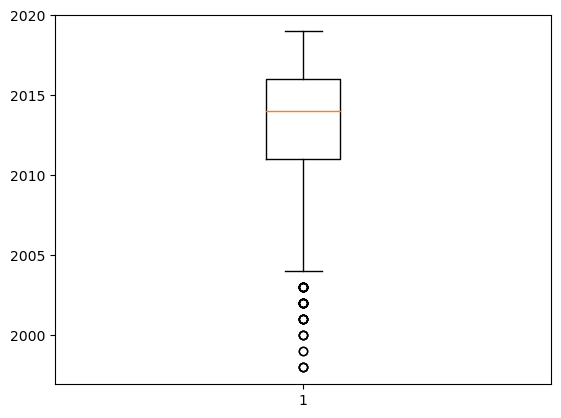

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(df['Year'])
plt.show()

In [6]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [7]:
## Standarize the values

for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = df[col].str.lower().str.replace(" ","_")

In [8]:
df.shape

(6019, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unnamed:_0         6019 non-null   int64  
 1   name               6019 non-null   object 
 2   location           6019 non-null   object 
 3   year               6019 non-null   int64  
 4   kilometers_driven  6019 non-null   int64  
 5   fuel_type          6019 non-null   object 
 6   transmission       6019 non-null   object 
 7   owner_type         6019 non-null   object 
 8   mileage            6017 non-null   object 
 9   engine             5983 non-null   object 
 10  power              5983 non-null   object 
 11  seats              5977 non-null   float64
 12  new_price          824 non-null    object 
 13  price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [10]:
df.isnull().sum()

unnamed:_0              0
name                    0
location                0
year                    0
kilometers_driven       0
fuel_type               0
transmission            0
owner_type              0
mileage                 2
engine                 36
power                  36
seats                  42
new_price            5195
price                   0
dtype: int64

# Checking Duplicates

In [11]:
df.duplicated().sum()

0

 I dropped the NAN values it will be better if we filled it with mean or median

In [12]:
df.dropna(inplace=True)

In [14]:
df['fuel_type'].value_counts()

diesel    443
petrol    371
cng         9
Name: fuel_type, dtype: int64

In [15]:
df['transmission'].value_counts()

manual       512
automatic    311
Name: transmission, dtype: int64

In [16]:
df['owner_type'].value_counts()

first     765
second     55
third       3
Name: owner_type, dtype: int64

In [17]:
df['mileage'].value_counts()

24.3_kmpl      36
18.9_kmpl      32
22.5_kmpl      28
28.4_kmpl      27
11.36_kmpl     23
               ..
32.26_km/kg     1
21.72_kmpl      1
17.84_kmpl      1
12.62_kmpl      1
13.7_kmpl       1
Name: mileage, Length: 152, dtype: int64

In [18]:
df['engine'].value_counts()

1248_cc    92
1197_cc    81
998_cc     64
1498_cc    55
1995_cc    53
2755_cc    37
1497_cc    35
1199_cc    33
1198_cc    21
1798_cc    20
2393_cc    20
1591_cc    20
1968_cc    19
1582_cc    17
1461_cc    17
799_cc     16
2143_cc    15
1193_cc    14
1956_cc    14
1999_cc    13
1196_cc    12
999_cc     11
2987_cc    11
1186_cc    10
2993_cc    10
1598_cc    10
2179_cc    10
1364_cc     9
1950_cc     8
1496_cc     8
1998_cc     8
2523_cc     7
2477_cc     6
1462_cc     6
2967_cc     4
2996_cc     4
1194_cc     3
1969_cc     3
1493_cc     3
2894_cc     2
1396_cc     2
2489_cc     2
2498_cc     2
1991_cc     2
2198_cc     1
1997_cc     1
1086_cc     1
2925_cc     1
4951_cc     1
2487_cc     1
1984_cc     1
1395_cc     1
2995_cc     1
2999_cc     1
1595_cc     1
2694_cc     1
1368_cc     1
1047_cc     1
Name: engine, dtype: int64

In [19]:
df['power'].value_counts()

190_bhp       55
81.86_bhp     41
88.5_bhp      39
67.04_bhp     38
88.7_bhp      32
              ..
174.57_bhp     1
67.05_bhp      1
99.6_bhp       1
58.2_bhp       1
103_bhp        1
Name: power, Length: 115, dtype: int64

In [20]:
df['new_price'].value_counts()

95.13_lakh    6
4.78_lakh     6
63.71_lakh    6
11.26_lakh    5
44.28_lakh    5
             ..
39.6_lakh     1
1.27_cr       1
38.11_lakh    1
8.12_lakh     1
9.93_lakh     1
Name: new_price, Length: 540, dtype: int64

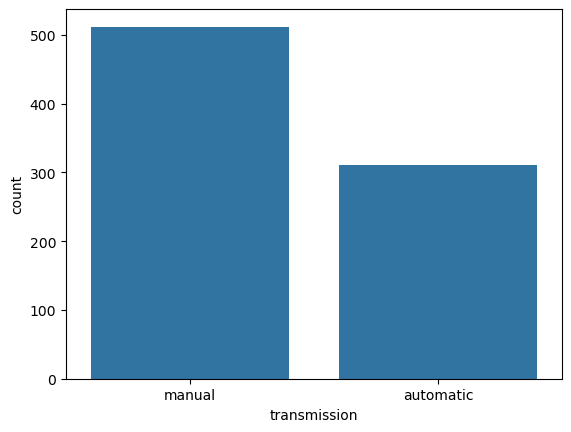

In [21]:
sns.countplot(x=df['transmission'])
plt.show()

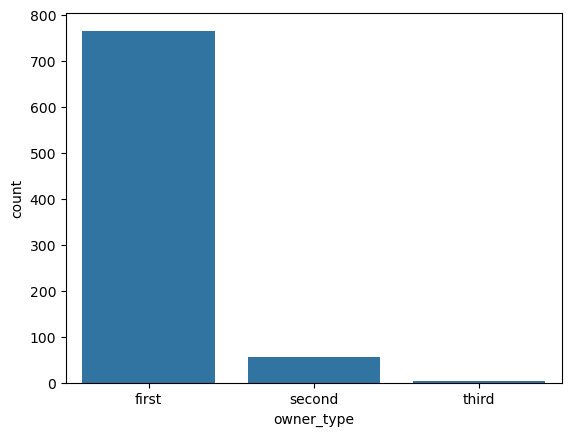

In [22]:
sns.countplot(x=df['owner_type'])
plt.show()

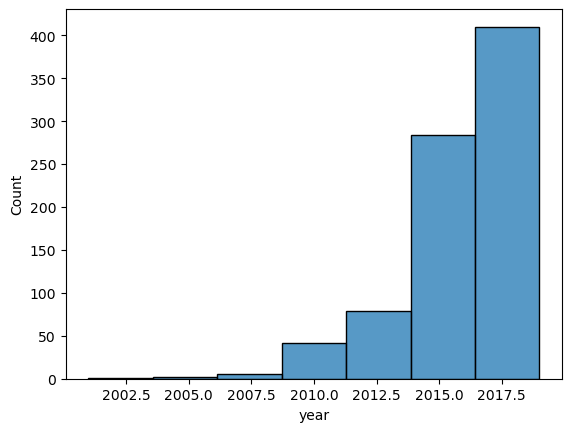

In [23]:
sns.histplot(df['year'],bins=7,stat = 'count')
plt.show()

In [24]:
df['seats'].skew()

1.5188608568052178

# Data Encoding

In [26]:
df['owner_type']=df['owner_type'].map({'first':1,'second':2,'third':3,
                                      'fourth & above':4})
df['fuel_type']=df['fuel_type'].map({'dieael':1,'petrol':2,'cng':3})
df['transmission']=df['transmission'].map({'manual':1,'automatic':2})

In [27]:
df['engine']=df['engine'].str.rstrip('_cc')
df['power']=df['power'].str.rstrip('_bhp')
df['mileage']=df['mileage'].str.rstrip('_kmpl')
df['mileage']=df['mileage'].str.rstrip('_km/kg').astype('float')

In [28]:
df['engine'] = df['engine'].astype('float')
df['power']=pd.to_numeric(df['power'],errors='coerce')

In [29]:
df.head()

,unnamed:_0,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
2,2,honda_jazz_v,chennai,2011,46000,2.0,1,1,18.20,1199.0,88.70,5.0,8.61_lakh,4.50
7,7,toyota_innova_crysta_2.8_gx_at_8s,mumbai,2016,36000,NaN,2,1,11.36,2755.0,171.50,8.0,21_lakh,17.50
10,10,maruti_ciaz_zeta,kochi,2018,25692,2.0,1,1,21.56,1462.0,103.25,5.0,10.65_lakh,9.95
15,15,mitsubishi_pajero_sport_4x4,delhi,2014,110000,NaN,1,1,13.50,2477.0,175.56,7.0,32.01_lakh,15.00
20,20,bmw_3_series_320d,kochi,2014,32982,NaN,2,1,22.69,1995.0,190.00,5.0,47.87_lakh,18.55


In [31]:
df['fuel_type'].value_counts()

2.0    371
3.0      9
Name: fuel_type, dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
df.isnull().sum()

unnamed:_0           0
name                 0
location             0
year                 0
kilometers_driven    0
fuel_type            0
transmission         0
owner_type           0
mileage              0
engine               0
power                0
seats                0
new_price            0
price                0
dtype: int64

In [34]:
df.head()

,unnamed:_0,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
2,2,honda_jazz_v,chennai,2011,46000,2.0,1,1,18.20,1199.0,88.70,5.0,8.61_lakh,4.50
10,10,maruti_ciaz_zeta,kochi,2018,25692,2.0,1,1,21.56,1462.0,103.25,5.0,10.65_lakh,9.95
28,28,honda_wrv_i-vtec_vx,kochi,2018,37430,2.0,1,1,17.50,1199.0,88.70,5.0,10.57_lakh,9.90
34,34,volkswagen_vento_1.6_highline,coimbatore,2014,55431,2.0,1,2,16.09,1598.0,103.50,5.0,12.33_lakh,6.98
44,44,hyundai_elantra_2.0_sx_option_at,bangalore,2014,46374,2.0,2,1,14.62,1999.0,149.92,5.0,23.64_lakh,8.85


In [35]:
df['new_price'] = df['new_price'].str.rstrip('_lakh')
df['new_price'] = df['new_price'].str.rstrip('_cr').astype('float')

In [36]:
df.dtypes

unnamed:_0             int64
name                  object
location              object
year                   int64
kilometers_driven      int64
fuel_type            float64
transmission           int64
owner_type             int64
mileage              float64
engine               float64
power                float64
seats                float64
new_price            float64
price                float64
dtype: object

In [39]:
df.drop(columns=['unnamed:_0','name','location' ], axis=1, inplace=True)

In [40]:
df.head()

,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
2,2011,46000,2.0,1,1,18.20,1199.0,88.70,5.0,8.61,4.50
10,2018,25692,2.0,1,1,21.56,1462.0,103.25,5.0,10.65,9.95
28,2018,37430,2.0,1,1,17.50,1199.0,88.70,5.0,10.57,9.90
34,2014,55431,2.0,1,2,16.09,1598.0,103.50,5.0,12.33,6.98
44,2014,46374,2.0,2,1,14.62,1999.0,149.92,5.0,23.64,8.85


In [41]:
df.corr()

,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
year,1.000000,-0.554942,-0.075039,0.134270,-0.382069,0.002920,-0.024137,-0.013943,-0.040982,0.041833,0.219718
kilometers_driven,-0.554942,1.000000,0.170448,-0.122131,0.285407,-0.032435,-0.005629,-0.053761,0.143965,-0.040586,-0.219364
fuel_type,-0.075039,0.170448,1.000000,-0.104526,-0.039105,0.489674,-0.114642,-0.110424,-0.050338,-0.078438,-0.078693
transmission,0.134270,-0.122131,-0.104526,1.000000,-0.001538,-0.295378,0.429154,0.462603,-0.152439,0.468264,0.457563
owner_type,-0.382069,0.285407,-0.039105,-0.001538,1.000000,-0.078567,0.055201,0.027194,-0.047317,0.045474,-0.077926
mileage,0.002920,-0.032435,0.489674,-0.295378,-0.078567,1.000000,-0.644879,-0.579950,-0.142213,-0.495879,-0.449097
engine,-0.024137,-0.005629,-0.114642,0.429154,0.055201,-0.644879,1.000000,0.925873,-0.238927,0.721485,0.765751
power,-0.013943,-0.053761,-0.110424,0.462603,0.027194,-0.579950,0.925873,1.000000,-0.336150,0.701884,0.827715
seats,-0.040982,0.143965,-0.050338,-0.152439,-0.047317,-0.142213,-0.238927,-0.336150,1.000000,-0.244728,-0.384172
new_price,0.041833,-0.040586,-0.078438,0.468264,0.045474,-0.495879,0.721485,0.701884,-0.244728,1.000000,0.804426


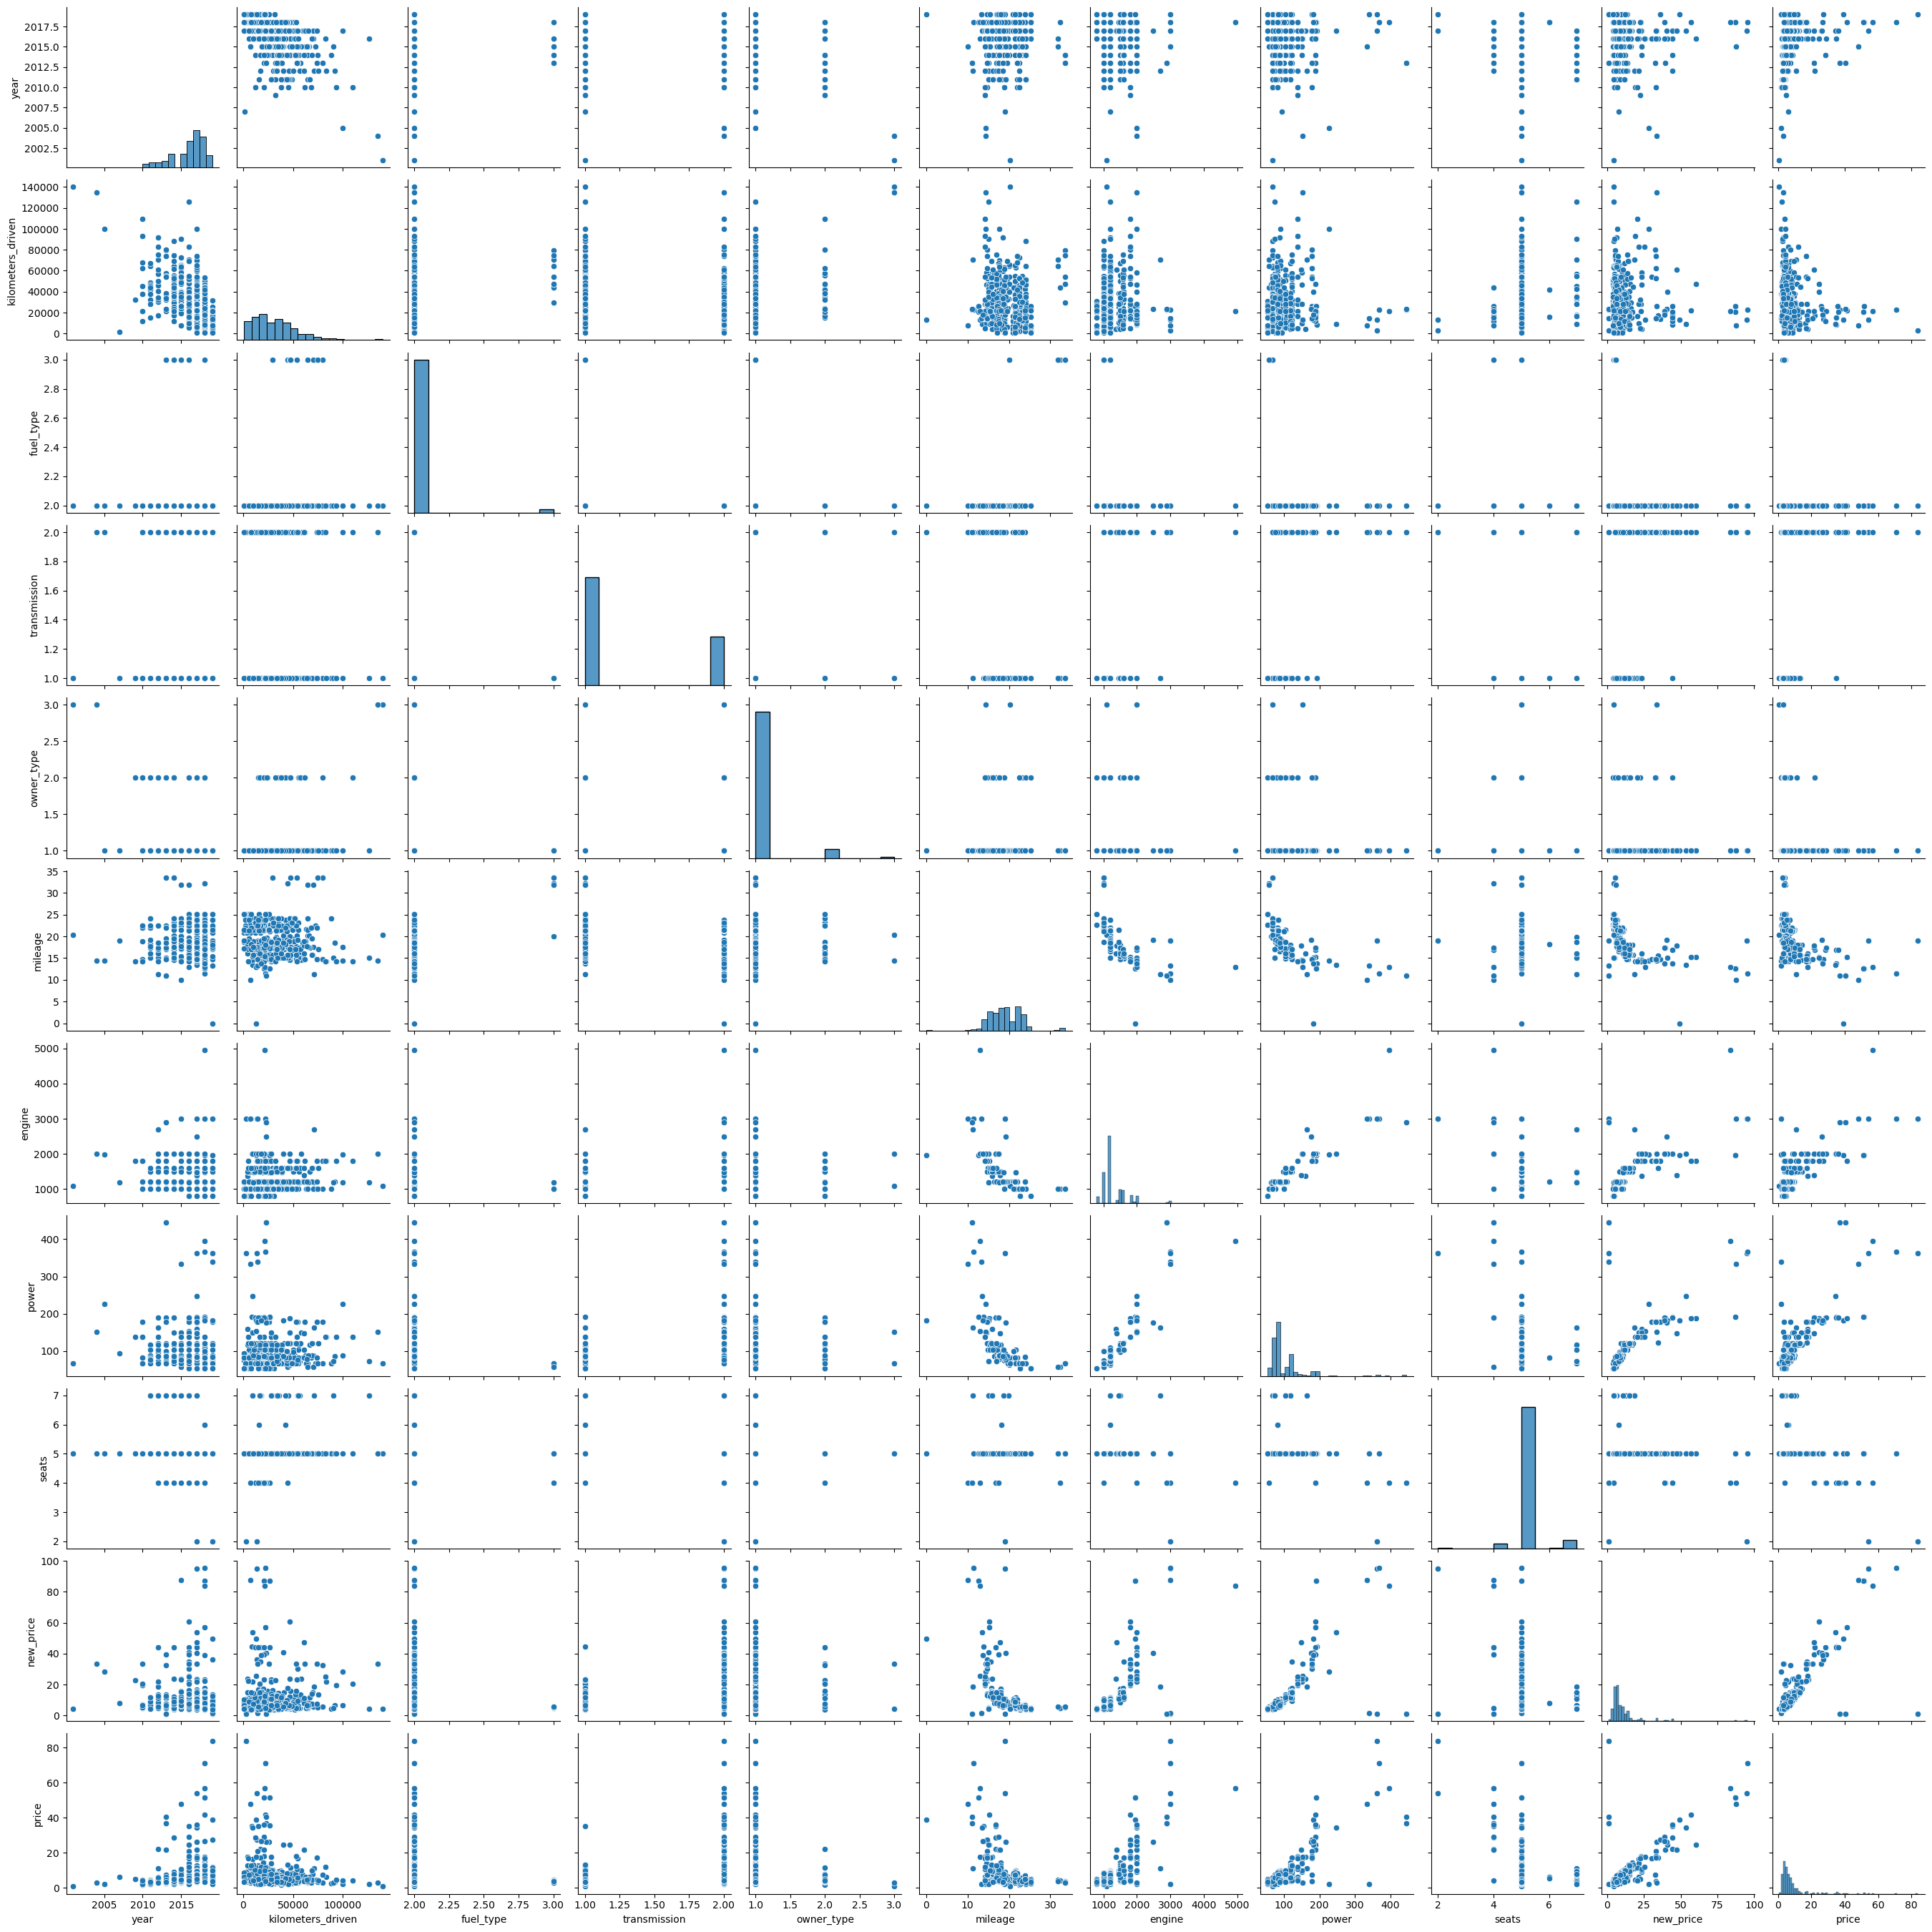

In [42]:
sns.pairplot(df)
plt.show()

# Create X and y

In [44]:
X = pd.get_dummies(df.drop("price",axis=1),drop_first=True)
y = df['price']

In [45]:
X

,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price
2,2011,46000,2.0,1,1,18.20,1199.0,88.70,5.0,8.61
10,2018,25692,2.0,1,1,21.56,1462.0,103.25,5.0,10.65
28,2018,37430,2.0,1,1,17.50,1199.0,88.70,5.0,10.57
34,2014,55431,2.0,1,2,16.09,1598.0,103.50,5.0,12.33
44,2014,46374,2.0,2,1,14.62,1999.0,149.92,5.0,23.64
...,...,...,...,...,...,...,...,...,...,...
5981,2017,6000,2.0,1,1,21.40,1197.0,83.10,5.0,8.78
5987,2017,15386,2.0,1,1,23.84,1199.0,84.00,5.0,5.56
5999,2016,10000,2.0,1,1,17.57,1193.0,88.70,5.0,7.77
6002,2011,38000,2.0,1,1,16.09,1598.0,103.50,5.0,11.91


In [46]:
y

2       4.50
10      9.95
28      9.90
34      6.98
44      8.85
        ... 
5981    7.50
5987    5.11
5999    4.00
6002    3.25
6010    3.20
Name: price, Length: 380, dtype: float64

# Spliting the Data

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=True)

In [48]:
X_train

,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price
5280,2014,38000,2.0,1,1,16.09,1598.0,103.50,5.0,10.94
5626,2017,73641,2.0,2,1,14.67,1798.0,177.46,5.0,33.36
4807,2013,80000,2.0,2,2,14.67,1798.0,177.46,5.0,32.54
1747,2017,28371,2.0,1,1,15.10,1196.0,73.00,7.0,4.98
5650,2016,126000,2.0,1,1,15.10,1196.0,73.00,7.0,4.43
...,...,...,...,...,...,...,...,...,...,...
3273,2018,34630,2.0,2,1,21.40,1197.0,83.10,5.0,8.57
4253,2013,32576,2.0,1,1,19.50,1199.0,88.76,5.0,7.36
1270,2018,22974,2.0,2,1,18.00,1497.0,117.30,5.0,15.55
3964,2012,50297,2.0,1,1,16.95,1498.0,97.60,5.0,8.55


In [49]:
y_test

4119     3.41
2977     5.49
4652     3.59
3078     4.68
3944     3.00
        ...  
5291     8.15
5308     4.50
2728     9.51
3158    21.73
3156     6.84
Name: price, Length: 76, dtype: float64

# Modeling

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [51]:
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: -1307.0267545430775
Coefficients: [ 6.50914384e-01 -2.56721603e-05  1.24979477e+00 -3.43998371e-01
 -1.11833780e+00  2.50566851e-02 -2.57834573e-03  1.10659580e-01
 -1.74162243e+00  3.09772822e-01]


In [52]:
ypred_test = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error
print("Test MAE:",mean_absolute_error(y_test,ypred_test))

Test MAE: 1.4970567802716483


In [54]:
from sklearn.metrics import mean_squared_error
print("Test MSE:",mean_squared_error(y_test,ypred_test))

Test MSE: 4.194440473889496


In [55]:
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))

Test RMSE: 2.048033318549651


In [56]:
ypred_test=model.predict(X_test)

print('Test R2:',model.score(X_test,y_test))

Test R2: 0.8846359772357411


In [57]:
ypred_train=model.predict(X_train)
print('Train R2:',model.score(X_train,y_train))

Train R2: 0.8404087774924193


In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
print("Cross validation score:",scores.mean())

Cross validation score: 0.7500237024451346


In [59]:
error = y_test-ypred_test

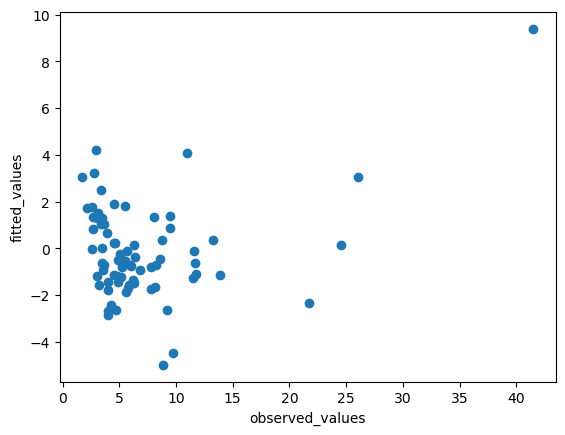

In [60]:
plt.scatter(y_test,error)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

In [61]:
error.skew()

1.3582845465888562

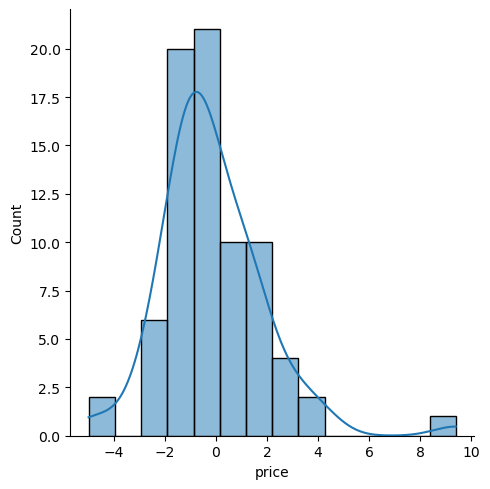

In [62]:
sns.displot(error,kde=True)
plt.show()

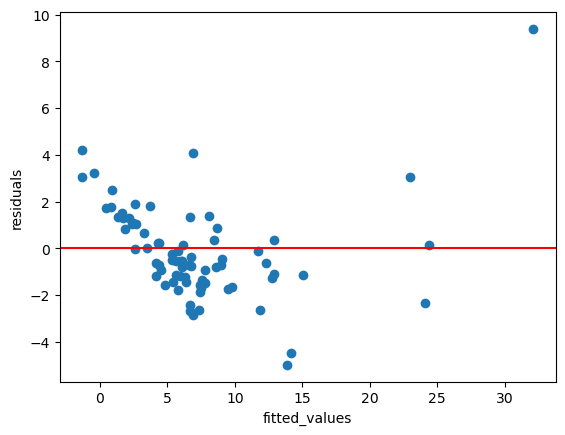

In [63]:
plt.scatter(ypred_test,error)
plt.axhline(y=0,color='red')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

In [64]:
import statsmodels.formula.api as smf
model2 = smf.ols("y~X",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     201.7
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          7.35e-143
Time:                        17:01:48   Log-Likelihood:                -1047.2
No. Observations:                 380   AIC:                             2116.
Df Residuals:                     369   BIC:                             2160.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1240.3274    201.575     -6.153      0.000   -1636.707    -843.948
X[0]           0.6168      0.100      6.185      0.000       0.421       0.813
X[1]       -2.681e-05    1.1e-05     -2.432      0.015   -4.85e-05   -5.13e-06
X[2]           0.7509      1.644      0.457      0.648      -2.482       3.984
X[3]          -0.4772      0.504     -0.947      0.344      -1.468       0.514
X[4]          -1.0603      0.802     -1.322      0.187      -2.638       0.517
X[5]           0.0795      0.090      0.887      0.376      -0.097       0.256
X[6]          -0.0030      0.001     -2.153      0.032      -0.006      -0.000
X[7]           0.1152      0.011     10.795      0.000       0.094       0.136
X[8]          -1.3458      0.449     -2.997      0.003      -2.229      -0.463
X[9]           0.3234      0.022     14.627      0.000       0.280       0.367
==============================================================================
Omnibus:                      409.194   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79327.637
Skew:                           4.126   Prob(JB):                         0.00
Kurtosis:                      73.300   Cond. No.                     3.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

ypred_test = model.predict(X_test)
ypred_train=model.predict(X_train)

print('Test R2:',model.score(X_test,y_test))
print('Train R2:',model.score(X_train,y_train))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
print("Cross validation score:",scores.mean())

Intercept: -1307.0267545430775
Coefficients: [ 6.50914384e-01 -2.56721603e-05  1.24979477e+00 -3.43998371e-01
 -1.11833780e+00  2.50566851e-02 -2.57834573e-03  1.10659580e-01
 -1.74162243e+00  3.09772822e-01]
Test R2: 0.8846359772357411
Train R2: 0.8404087774924193
Cross validation score: 0.7500237024451346


# Prediction on New data

In [66]:
data = pd.read_csv(r"C:\Users\Samson\Downloads\test-data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [67]:
data.shape

(1234, 13)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


# Data Preprocessing

In [69]:
data.dropna(inplace=True)

In [70]:
data.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

In [71]:
data.drop(columns=['Unnamed: 0','Name','Location'],inplace=True,axis=1)

In [72]:
data

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
30,2014,70000,Diesel,Manual,Second,23.59 kmpl,1364 CC,67.06 bhp,5.0,9.27 Lakh
36,2017,13500,Petrol,Automatic,First,14.84 kmpl,1598 CC,103.52 bhp,5.0,14.95 Lakh
39,2012,66889,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,70.43 Lakh
43,2018,4000,Petrol,Manual,First,15.41 kmpl,1598 CC,103.52 bhp,5.0,11.89 Lakh
...,...,...,...,...,...,...,...,...,...,...
1209,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,7.06 Lakh
1212,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,8.79 Lakh
1213,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0,18.16 Lakh
1216,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.57 Lakh


# Data Encoding

In [73]:
data['Transmission'].value_counts()

Manual       118
Automatic     64
Name: Transmission, dtype: int64

In [74]:
data['Owner_Type']=data['Owner_Type'].map({'First':1,'Second':2})
data['Fuel_Type']=data['Fuel_Type'].map({'Diesel':1,'Petrol':2,'CNG':3})
data['Transmission']=data['Transmission'].map({'Manual':1,'Automatic':2})

In [75]:
data['Engine']=data['Engine'].str.rstrip('_cc')
data['Power']=data['Power'].str.rstrip('_bhp')
data['Mileage']=data['Mileage'].str.rstrip('_kmpl')
data['Mileage']=data['Mileage'].str.rstrip('_km/kg').astype('float')

In [76]:
data['Engine'].value_counts()

1197 CC    18
1248 CC    17
998 CC     16
1498 CC    15
1198 CC    12
1968 CC     8
2477 CC     7
1199 CC     6
1461 CC     6
1582 CC     5
1497 CC     5
1995 CC     5
799 CC      4
1186 CC     4
2755 CC     4
2523 CC     3
2143 CC     3
1956 CC     3
1798 CC     3
2393 CC     3
1591 CC     3
1999 CC     3
1598 CC     3
1196 CC     2
1364 CC     2
1496 CC     2
1998 CC     2
2987 CC     1
1997 CC     1
2498 CC     1
2996 CC     1
2489 CC     1
1193 CC     1
1047 CC     1
1493 CC     1
5998 CC     1
1462 CC     1
1950 CC     1
1595 CC     1
999 CC      1
1396 CC     1
2993 CC     1
796 CC      1
2487 CC     1
1368 CC     1
Name: Engine, dtype: int64

In [77]:
data

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,2017,34000,1,1,1,13.68,2393 CC,147.8,7.0,25.27 Lakh
30,2014,70000,1,1,2,23.59,1364 CC,67.06,5.0,9.27 Lakh
36,2017,13500,2,2,1,14.84,1598 CC,103.52,5.0,14.95 Lakh
39,2012,66889,1,2,1,22.48,1995 CC,190,5.0,70.43 Lakh
43,2018,4000,2,1,1,15.41,1598 CC,103.52,5.0,11.89 Lakh
...,...,...,...,...,...,...,...,...,...,...
1209,2016,41413,1,1,1,27.28,1047 CC,69,5.0,7.06 Lakh
1212,2017,39015,2,1,1,17.00,1497 CC,121.36,5.0,8.79 Lakh
1213,2018,6000,2,1,1,16.00,1368 CC,160,5.0,18.16 Lakh
1216,2017,21380,1,1,1,24.30,1248 CC,88.5,5.0,10.57 Lakh


In [78]:
# Assuming 'Engine' column contains strings like '2393 CC'
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)

# Now, convert 'Power' column to numeric
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')


In [79]:
data['New_Price'] = data['New_Price'].str.rstrip('_Lakh')
data['New_Price'] = data['New_Price'].str.rstrip('_Cr').astype('float')

In [80]:
df.columns

Index(['year', 'kilometers_driven', 'fuel_type', 'transmission', 'owner_type',
       'mileage', 'engine', 'power', 'seats', 'new_price', 'price'],
      dtype='object')

In [81]:
data.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'New_Price'],
      dtype='object')

In [82]:
new_column_names={'Year':'year','Kilometers_Driven':'kilometers_driven','Fuel_Type':'fuel_type','Transmission':'transmission',
                 'Owner_Type':'owner_type','Mileage':'mileage','Engine':'engine','Power':'power','Seats':'seats','New_Price':'new_price'}
df = pd.DataFrame(data)
new_column_names


{'Year': 'year',
 'Kilometers_Driven': 'kilometers_driven',
 'Fuel_Type': 'fuel_type',
 'Transmission': 'transmission',
 'Owner_Type': 'owner_type',
 'Mileage': 'mileage',
 'Engine': 'engine',
 'Power': 'power',
 'Seats': 'seats',
 'New_Price': 'new_price'}

In [83]:
df.rename(columns = new_column_names,inplace=True)

In [84]:
data.columns

Index(['year', 'kilometers_driven', 'fuel_type', 'transmission', 'owner_type',
       'mileage', 'engine', 'power', 'seats', 'new_price'],
      dtype='object')

In [85]:
df.columns

Index(['year', 'kilometers_driven', 'fuel_type', 'transmission', 'owner_type',
       'mileage', 'engine', 'power', 'seats', 'new_price'],
      dtype='object')

In [86]:
d = model.predict(data)

In [87]:
data['price'] = d

In [88]:
data

,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
2,2017,34000,1,1,1,13.68,2393.0,147.80,7.0,25.27,10.947045
30,2014,70000,1,1,2,23.59,1364.0,67.06,5.0,9.27,-0.554579
36,2017,13500,2,2,1,14.84,1598.0,103.52,5.0,14.95,9.844354
39,2012,66889,1,2,1,22.48,1995.0,190.00,5.0,70.43,29.893243
43,2018,4000,2,1,1,15.41,1598.0,103.52,5.0,11.89,10.149530
...,...,...,...,...,...,...,...,...,...,...,...
1209,2016,41413,1,1,1,27.28,1047.0,69.00,5.0,7.06,3.039354
1212,2017,39015,2,1,1,17.00,1497.0,121.36,5.0,8.79,9.913829
1213,2018,6000,2,1,1,16.00,1368.0,160.00,5.0,18.16,18.898317
1216,2017,21380,1,1,1,24.30,1248.0,88.50,5.0,10.57,6.856807


In [89]:
pwd

'C:\\Users\\Samson'

In [90]:
data.to_csv("Used cars Test Data.csv",index=None)

In [91]:
data['price'] = data['price'].astype("float")

In [92]:
data

,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
2,2017,34000,1,1,1,13.68,2393.0,147.80,7.0,25.27,10.947045
30,2014,70000,1,1,2,23.59,1364.0,67.06,5.0,9.27,-0.554579
36,2017,13500,2,2,1,14.84,1598.0,103.52,5.0,14.95,9.844354
39,2012,66889,1,2,1,22.48,1995.0,190.00,5.0,70.43,29.893243
43,2018,4000,2,1,1,15.41,1598.0,103.52,5.0,11.89,10.149530
...,...,...,...,...,...,...,...,...,...,...,...
1209,2016,41413,1,1,1,27.28,1047.0,69.00,5.0,7.06,3.039354
1212,2017,39015,2,1,1,17.00,1497.0,121.36,5.0,8.79,9.913829
1213,2018,6000,2,1,1,16.00,1368.0,160.00,5.0,18.16,18.898317
1216,2017,21380,1,1,1,24.30,1248.0,88.50,5.0,10.57,6.856807
